<a href="https://colab.research.google.com/github/nm1708/global-terriorism-data-analysis-1/blob/main/edaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
#IMPORT SOME LIBERARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#IMPORT GOOGLE COLAB 
from google.colab import drive

In [29]:
#MOUNT THE DRIVE
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
#READING THE DATA
df_data=('/content/drive/MyDrive/data/Global Terrorism Data.csv')
df=pd.read_csv((df_data), encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [32]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [33]:
#GETTING TO KNOW THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


Data Cleaning

In [34]:
#TO VIEW SHAPE
print("There are {} rows and {} columns in the dataset".format(df.shape[0],df.shape[1]))

There are 181691 rows and 135 columns in the dataset


In [35]:
# NAME OF COLUMNS
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [36]:
#DATA TYPES OF COLUMNS
df.dtypes

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

In [37]:
#Descriptive Statistics
#Includes summarized central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#Calculating % of missing values in dataset
missing_values = (((df.isnull().sum()).sum())/df.size)*100
missing_values

56.481718962414206

**We have found that more than 50% of the values are Null,
Hence, we need to clean the Dataset**

**Selecting necessary columns only**

In [39]:
df = df[['iyear','imonth','iday','country_txt','provstate','region_txt','latitude','longitude','city','latitude','longitude','attacktype1_txt','nkill', 'nwound','gname','target1','targtype1_txt','weaptype1_txt']]
df.head(10)

,iyear,imonth,iday,country_txt,provstate,region_txt,latitude,longitude,city,latitude,longitude,attacktype1_txt,nkill,nwound,gname,target1,targtype1_txt,weaptype1_txt
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,18.456792,-69.951164,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,19.371887,-99.086624,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,15.478598,120.599741,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,37.997490,23.762728,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,37.005105,-89.176269,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,-34.891151,-56.187214,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,37.791927,-122.225906,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,43.076592,-89.412488,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,43.072950,-89.386694,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


**Renaming the columns**

In [40]:
df.rename(columns={'iyear':'Year',
                   'imonth':'Month',
                   'iday':'Day',
                   'country_txt':'Country',
                   'provstate':'State',
                   'region_txt':'Region',
                   'latitude':'Latitude',
                   'longitude':'Longitude',
                   'attacktype1_txt':'Attack_Type',
                   'target1':'Target',
                   'nkill':'Killed',
                   'nwound':'Attacked',
                   'gname':'Group',
                   'targtype1_txt':'Target_Type',
                   'weaptype1_txt':'Weapon_type',
                   'latitude':'Latitude',
                   'longitude':'Longitude',
                   'target1':'Target',
                   'city':'City'},inplace=True)
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,Day,Country,State,Region,Latitude,Longitude,City,Latitude,Longitude,Attack_Type,Killed,Attacked,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,18.456792,-69.951164,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,19.371887,-99.086624,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,15.478598,120.599741,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,37.997490,23.762728,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,37.005105,-89.176269,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,-34.891151,-56.187214,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,37.791927,-122.225906,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,43.076592,-89.412488,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,43.072950,-89.386694,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


**Again, checking the % of missing values**

In [41]:
missing_values = (((df.isnull().sum()).sum())/df.size)*100
missing_values

1.4169661678344

**Now the Dataset is ready to be worked on as the Null Values are only ~ 1.2% of the total dataset**

**Finding unique numbers in each column**

In [42]:
for i in df.columns:
    print(i, df[i].nunique())

Year 47
Month 13
Day 32
Country 205
State 2855
Region 12
Latitude Latitude    48322
Latitude    48322
dtype: int64
Longitude Longitude    48039
Longitude    48039
dtype: int64
City 36674
Latitude Latitude    48322
Latitude    48322
dtype: int64
Longitude Longitude    48039
Longitude    48039
dtype: int64
Attack_Type 9
Killed 205
Attacked 238
Group 3537
Target 86006
Target_Type 22
Weapon_type 12


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   City         181257 non-null  object 
 9   Latitude     177135 non-null  float64
 10  Longitude    177134 non-null  float64
 11  Attack_Type  181691 non-null  object 
 12  Killed       171378 non-null  float64
 13  Attacked     165380 non-null  float64
 14  Group        181691 non-null  object 
 15  Target       181055 non-null  object 
 16  Target_Type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
dtypes: float64(6), int64(3),

*From the above information we found that the numbers in Killed and Wounded are missing
Hence we'll fill the mean of 'Wounded' and 'Killed' in those places*

**Note : We can also fill 0 "Zero"**

In [44]:
df['Attacked'] = df['Attacked'].fillna(df['Attacked'].mean()).astype(int)
df['Killed'] = df['Killed'].fillna(df['Killed'].mean()).astype(int)

**Getting to know the new DataFrame**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   City         181257 non-null  object 
 9   Latitude     177135 non-null  float64
 10  Longitude    177134 non-null  float64
 11  Attack_Type  181691 non-null  object 
 12  Killed       181691 non-null  int64  
 13  Attacked     181691 non-null  int64  
 14  Group        181691 non-null  object 
 15  Target       181055 non-null  object 
 16  Target_Type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(5),

 **1-The Attack**
- Count of different types of attacks

In [46]:
df['Attack_Type'].value_counts() 

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

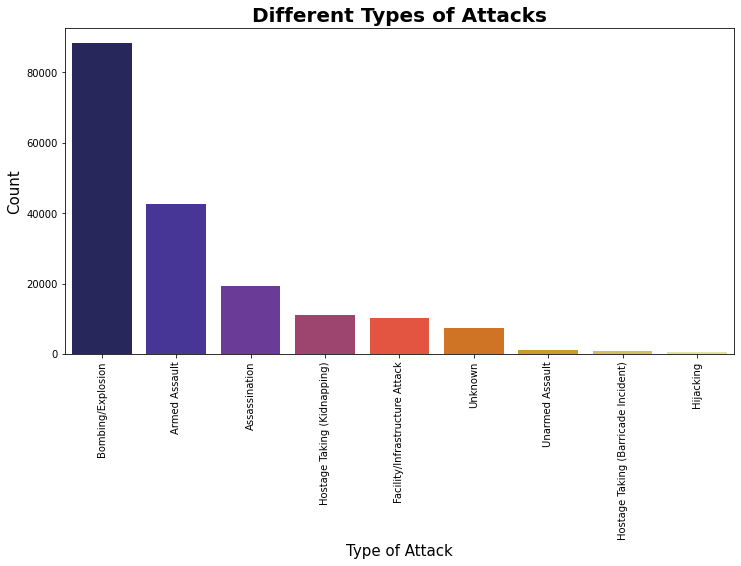

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Attack_Type'].value_counts().index, y = df['Attack_Type'].value_counts().values, palette='CMRmap')
plt.title('Different Types of Attacks', fontsize=20, weight = 'bold')
plt.xlabel('Type of Attack', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 90)
plt.show()

**Inference**
Top three type of attack is BOMBING/EXPLOSION,ARMED ASSAULT,ASSASSINATION

**- % of count of different types of attacks**

In [48]:
perc_Attack_Types = (df['Attack_Type'].value_counts()/df.shape[0])*100
perc_Attack_Types

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

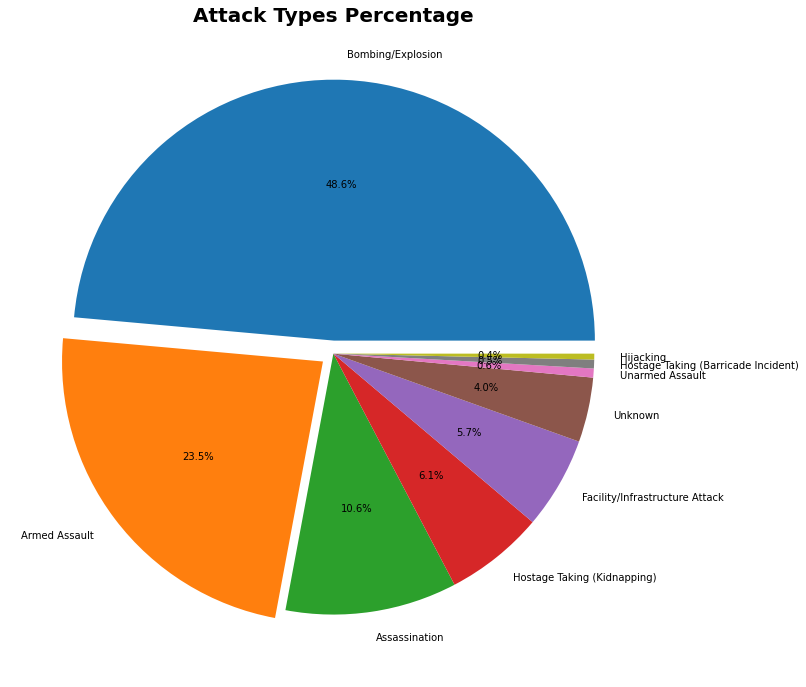

In [49]:
mylabels = df['Attack_Type'].value_counts().index
myexplode = (0.05,0.05,0,0,0,0,0,0,0)

plt.figure(figsize = (12,12))
plt.pie(perc_Attack_Types, explode=myexplode, labels=mylabels, autopct='%0.1f%%', shadow=False)
#plt.legend()
plt.title('Attack Types Percentage', fontsize=20, weight = 'bold')
plt.show()

**Inference**

**Top 5 types of attacks in %**

1-Bombing/Explosion 48.6%

2-Armed Assault 23.5%

3-Assassination 10.6%

4-Hostage Taking (Kidnapping) and 6.1%

5-Facility/Infrastructure Attack 5.7%



**2. The Countries and The States**
- Top 15 Countries with most attacks

In [50]:
df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

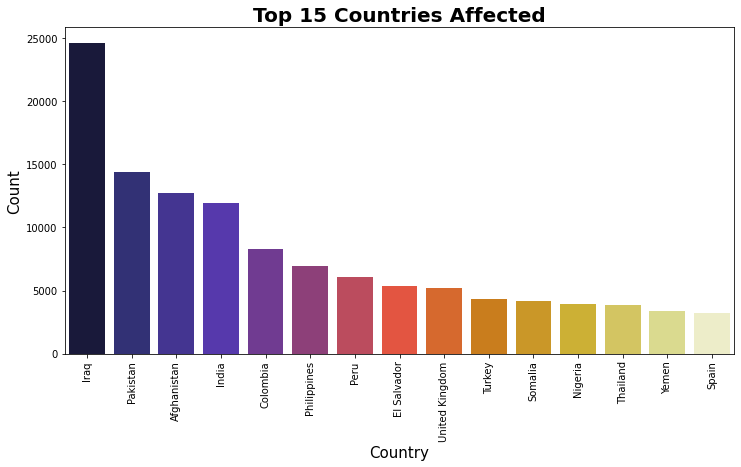

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Country'].value_counts()[:15].index, y = df['Country'].value_counts()[:15].values, palette='CMRmap')
plt.title('Top 15 Countries Affected', fontsize=20, weight = 'bold')
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 90)
plt.show()

**Inference**

Iraq,Pakistan,Afganistan are most affected counrties

In [52]:
perc_Country = (df['Country'].value_counts()[:15]/df['Target_Type'].shape[0])*100
perc_Country

Iraq              13.559285
Pakistan           7.907932
Afghanistan        7.006951
India              6.582605
Colombia           4.571498
Philippines        3.802060
Peru               3.355147
El Salvador        2.928048
United Kingdom     2.881265
Turkey             2.362252
Somalia            2.279695
Nigeria            2.150354
Thailand           2.118432
Yemen              1.842139
Spain              1.788201
Name: Country, dtype: float64

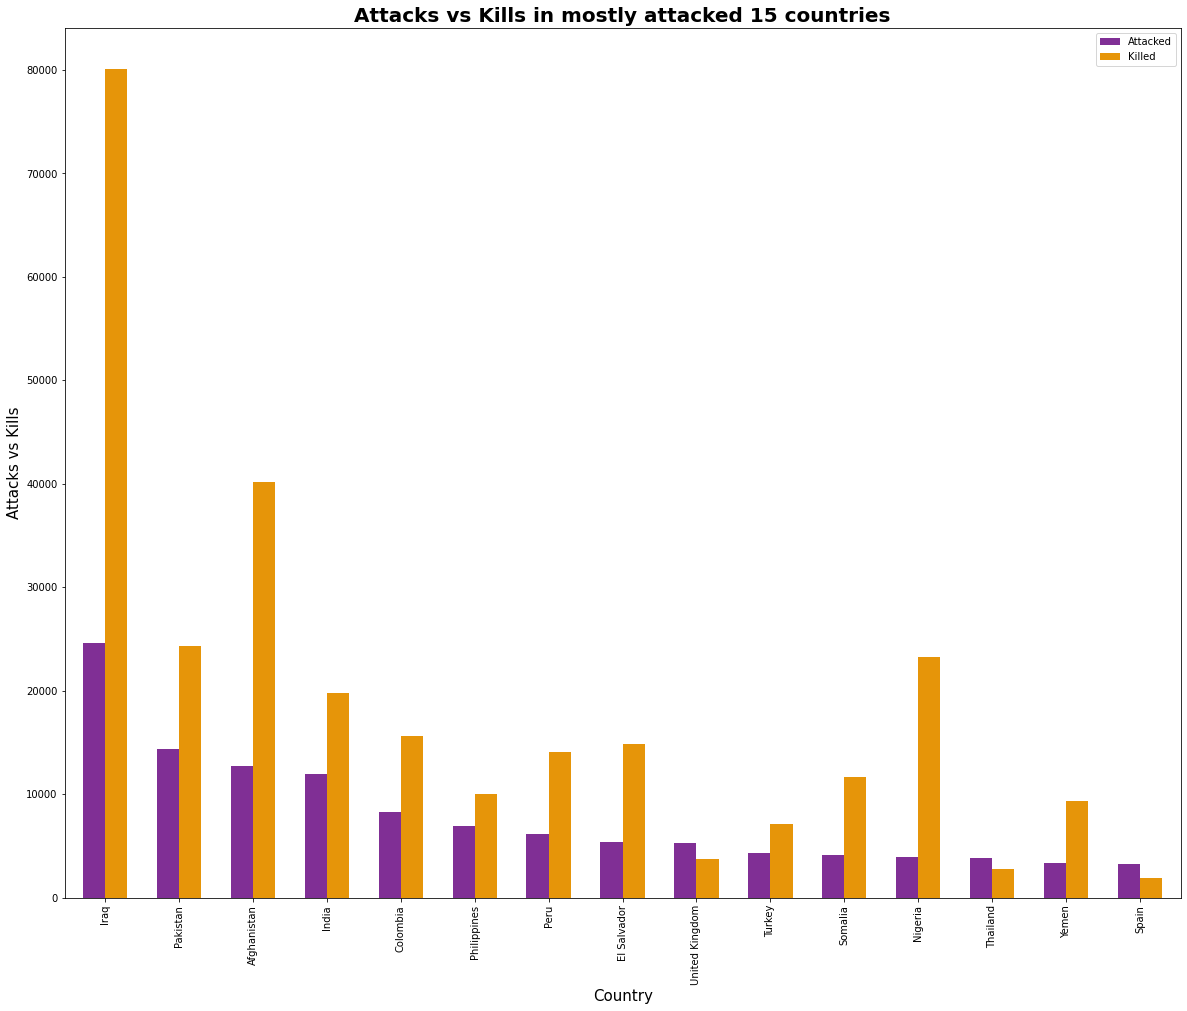

In [53]:
# Comparing No. of Attacks with Killings for top 15 countries

attacked = df.Country.value_counts()[:15].to_frame()
attacked.columns = ['Attacked']

kills = df.groupby(['Country'])['Killed'].sum().sort_values(ascending =False).to_frame()
attacked.merge(kills, how = 'left' , left_index = True, right_index = True ).plot.bar(width = 0.6 , color = sns.color_palette('CMRmap',2))
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.title("Attacks vs Kills in mostly attacked 15 countries", fontsize = 20, weight = 'bold')
plt.ylabel("Attacks vs Kills", fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.show()

**Top 5 countries attacked are :**

1-Iraq

2-Pakistan

3-Afghanistan

4-India
 
5-Colombia

**Inference**
most attack vs kill countries are IRAQ,PAKISTAN and followed by AFGANISTAN

**Top 15 States with most attacks (Except Unknown)**

In [54]:
df.State.value_counts()[:16].drop('Unknown')

Baghdad                                7645
Northern Ireland                       4498
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Name: State, dtype: int64

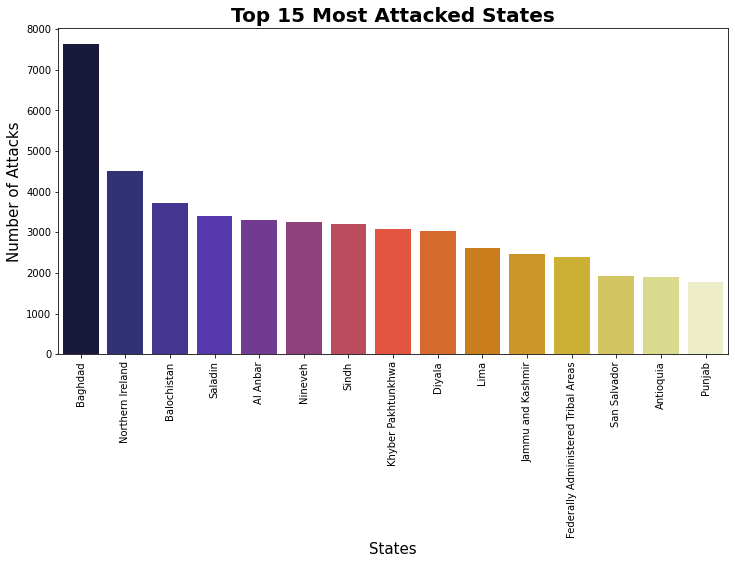

In [55]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['State'].value_counts()[:16].drop('Unknown').index, y = df['State'].value_counts()[:16].drop('Unknown').values, palette='CMRmap') # or flare_r
plt.title('Top 15 Most Attacked States',fontsize=20, weight = 'bold')
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()
#plt.gcf().set_size_inches(15, 5)

**Most number of state attacked**

In [56]:
perc_State = (df['State'].value_counts()[:15].drop('Unknown')/df['Target_Type'].shape[0])*100
perc_State

Baghdad                                4.207693
Northern Ireland                       2.475632
Balochistan                            2.041928
Saladin                                1.877363
Al Anbar                               1.815720
Nineveh                                1.783798
Sindh                                  1.764534
Khyber Pakhtunkhwa                     1.697387
Diyala                                 1.673721
Lima                                   1.439257
Jammu and Kashmir                      1.350645
Federally Administered Tribal Areas    1.316521
San Salvador                           1.058390
Antioquia                              1.040778
Name: State, dtype: float64

**Top 5 states attacked are :**

1-Baghdad

2-Northern Ireland

3-Balochistan

4-Saladin

5-Al Anbar

**Inference** BAGHDAD,NORTHERN IRELAND,BALOCHISTAN Are top three most number of attack states.

3. The Targets

**Top 15 Types of Target (Except Unknown)**

In [57]:
df['Target_Type'].value_counts()[:16].drop('Unknown')

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
Name: Target_Type, dtype: int64

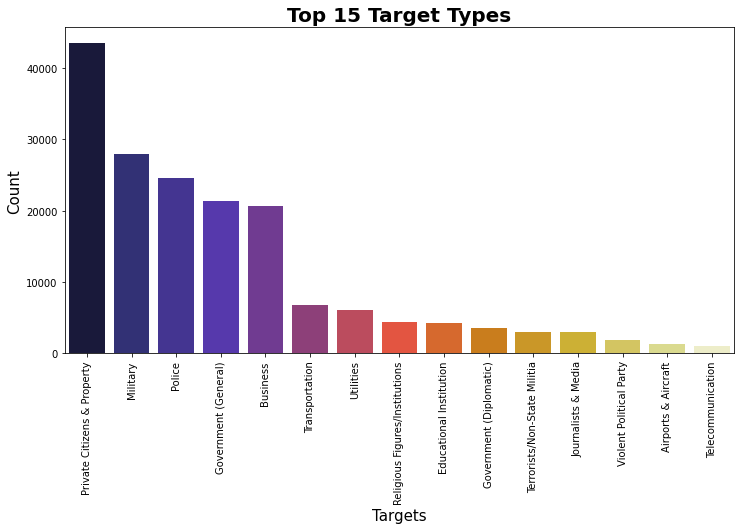

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Target_Type'].value_counts()[:16].drop('Unknown').index, y= df['Target_Type'].value_counts()[:16].drop('Unknown').values, palette='CMRmap')
plt.title('Top 15 Target Types', fontsize=20, weight = 'bold')
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 90)
plt.show()

**distribution of the Top 15 Targets (Except Unknown)**

In [59]:
perc_Target_Types = (df['Target_Type'].value_counts()[:16].drop('Unknown')/df['Target_Type'].shape[0])*100
perc_Target_Types

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Government (Diplomatic)            1.966526
Terrorists/Non-State Militia       1.672620
Journalists & Media                1.622535
Violent Political Party            1.027018
Airports & Aircraft                0.739167
Telecommunication                  0.555338
Name: Target_Type, dtype: float64

**Top 5 target type are**

1-Private Citizens & Property

2-Military

3-Police

4-Government (General)

5-Business

**Inference**mostly target PRIVATE CITIZENS & PROPERTY,MILITARY And followed by POLICE


**4. The Region**
- Regions with most attacks

In [60]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

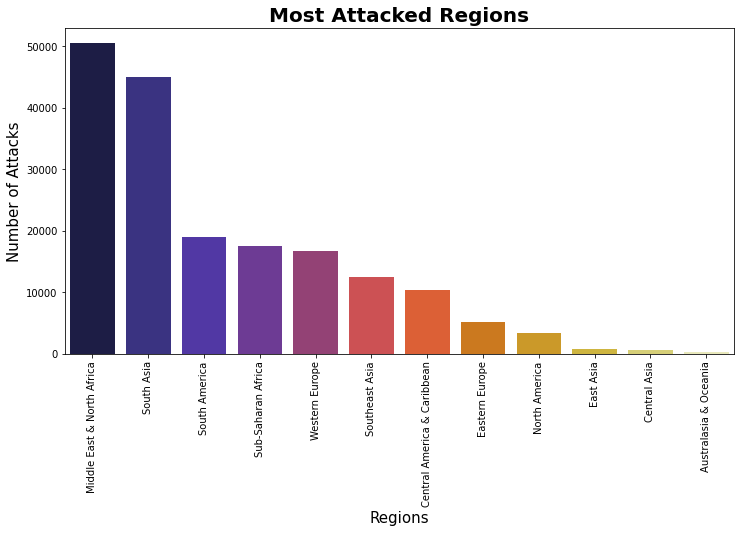

In [61]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Region'].value_counts().index, y = df['Region'].value_counts().values, palette='CMRmap') # or flare_r
plt.title('Most Attacked Regions',fontsize=20, weight = 'bold')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Attacks with region**

In [62]:
perc_Attack_Region = (df['Region'].value_counts()/df['Region'].shape[0])*100
perc_Attack_Region

Middle East & North Africa     27.780132
South Asia                     24.753015
South America                  10.445206
Sub-Saharan Africa              9.659257
Western Europe                  9.157856
Southeast Asia                  6.871557
Central America & Caribbean     5.693182
Eastern Europe                  2.831180
North America                   1.902131
East Asia                       0.441409
Central Asia                    0.309867
Australasia & Oceania           0.155209
Name: Region, dtype: float64

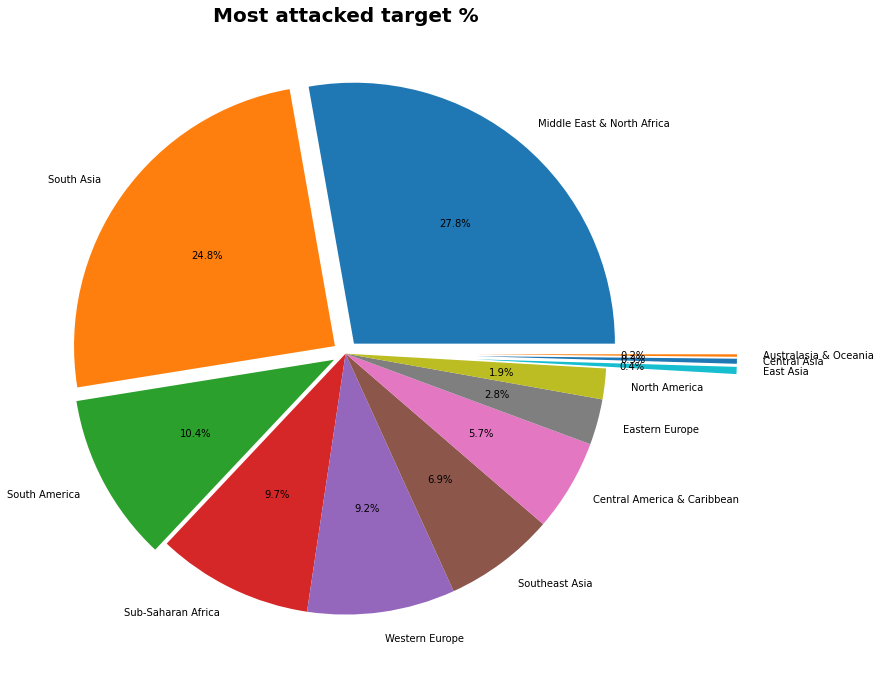

In [63]:
mylabels = df['Region'].value_counts().index
myexplode = (0.05,0.05,0.05,0,0,0,0,0,0,0.5,0.5,0.5)

plt.figure(figsize = (12,12))
plt.pie(perc_Attack_Region, labels=mylabels, explode=myexplode, autopct='%0.1f%%')
#plt.legend()
plt.title('Most attacked target %',fontsize=20, weight = 'bold')
plt.show()

**Top 5 attacked regions  are :**

1-Middle East & North Africa-27.8%

2-South Asia-24.8%

3-South America-10.4%

4-Sub-Saharan Africa-9.7%

5-Western Europe-9.2%

**Inference** Most attack region MIDDLE EAST & NORTH AFRICA,SOUTH ASIA,And followed by SOUTH AMERICA

**5.The weapons**
- Top 5 weapons used

In [64]:
df['Weapon_type'].value_counts().head(5)

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64

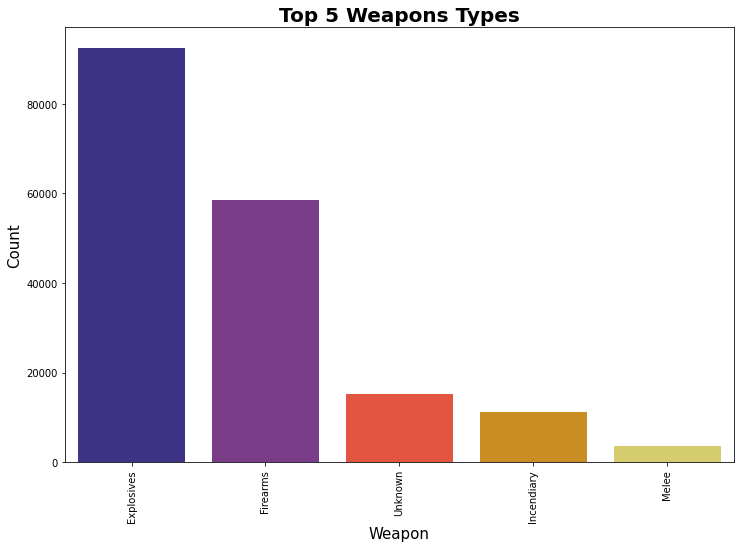

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x = df['Weapon_type'].value_counts().head(5).index,y = df['Weapon_type'].value_counts().head(5).values, palette='CMRmap')
plt.title('Top 5 Weapons Types', fontsize=20, weight = 'bold')
plt.xlabel('Weapon', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 90)
plt.show()

 **weapons used**

In [66]:
perc_Weapon_Type = (df['Weapon_type'].value_counts()/df['Weapon_type'].shape[0])*100
perc_Weapon_Type

Explosives                                                                     50.869883
Firearms                                                                       32.210731
Unknown                                                                         8.342185
Incendiary                                                                      6.128537
Melee                                                                           2.011657
Chemical                                                                        0.176674
Sabotage Equipment                                                              0.077604
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.074852
Other                                                                           0.062744
Biological                                                                      0.019263
Fake Weapons                                                                    0.018163
Radiological         

Since, The Chemical, Sabotage Equipment, Vehicle, Other, Biological, Fake Weapons, Radiological is less than 1, we will drop them while plotting

In [67]:
perc_Weapon_Type = (df['Weapon_type'].value_counts().head(5)/df['Weapon_type'].shape[0])*100
perc_Weapon_Type

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_type, dtype: float64

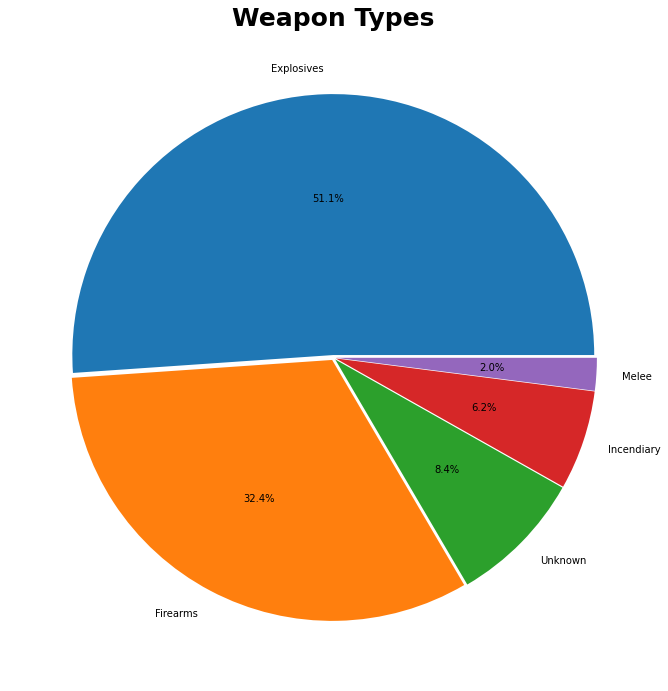

In [68]:
mylabels = df['Weapon_type'].value_counts().head(5).index
myexplode = (0.01,0.01,0.01,0.01,0.01)

plt.figure(figsize = (12,12))
plt.pie(perc_Weapon_Type, labels=mylabels, explode=myexplode, autopct='%0.1f%%')
#plt.legend()
plt.title('Weapon Types',fontsize=25, weight = 'bold')
plt.show()

**Top 5 weapons used**

1-Explosives

2-Firearms

3-Unknown

4-Incendiary

5-Mele

**Inference** EXPLOSIVES,FIREARMS And UNKNOWN Are most used weapons type.

**6. The attacking groups
Top 15 most attacking groups (except unknown)**

In [69]:
df['Group'].value_counts()[1:16]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Name: Group, dtype: int64

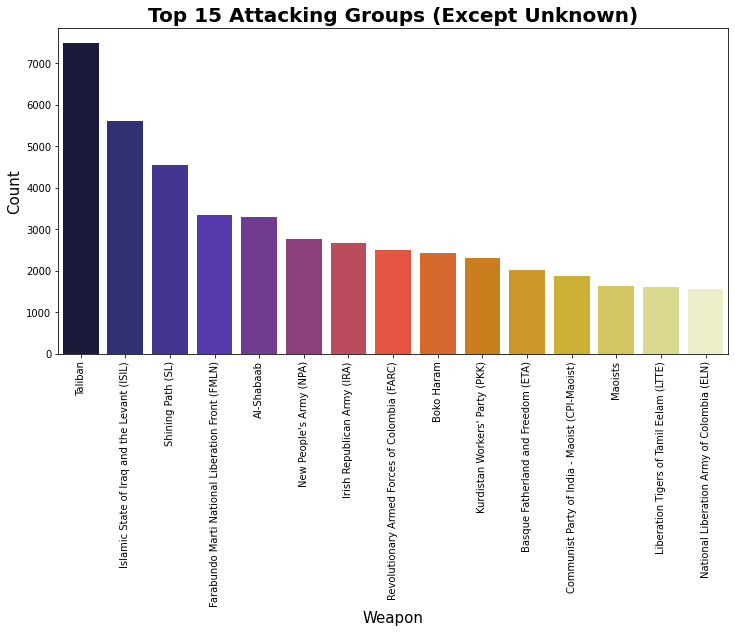

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x = df['Group'].value_counts()[1:16].index, y = df['Group'].value_counts()[1:16].values, palette='CMRmap')
plt.title('Top 15 Attacking Groups (Except Unknown)', fontsize=20, weight = 'bold')
plt.xlabel('Weapon', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 90)
plt.show()

**Top 15 most attacking groups (except unknown)**

In [71]:
perc_Group = (df['Group'].value_counts()[1:16]/df['Group'].shape[0])*100
perc_Group

Taliban                                             4.115779
Islamic State of Iraq and the Levant (ISIL)         3.089311
Shining Path (SL)                                   2.507004
Farabundo Marti National Liberation Front (FMLN)    1.844340
Al-Shabaab                                          1.809666
New People's Army (NPA)                             1.525667
Irish Republican Army (IRA)                         1.470078
Revolutionary Armed Forces of Colombia (FARC)       1.368807
Boko Haram                                          1.330831
Kurdistan Workers' Party (PKK)                      1.271389
Basque Fatherland and Freedom (ETA)                 1.113979
Communist Party of India - Maoist (CPI-Maoist)      1.033623
Maoists                                             0.897128
Liberation Tigers of Tamil Eelam (LTTE)             0.883918
National Liberation Army of Colombia (ELN)          0.859151
Name: Group, dtype: float64

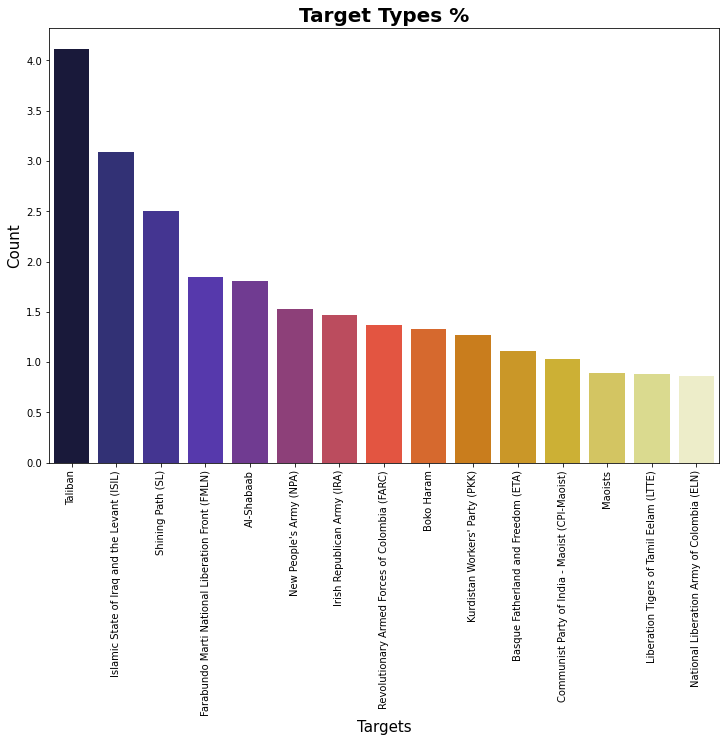

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x = perc_Group.index, y = perc_Group.values, palette='CMRmap')
plt.title('Target Types %', fontsize=20, weight = 'bold')
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 90)
plt.show()

**Top 5 terrorist groups :**

1-Taliban

2-Islamic State of Iraq and the Levant (ISIL)

3-Shining Path (SL)

4-Farabundo Marti National Liberation Front (FMLN)

5-Al-Shabaab

**Inference** TALIBAN,ISLAMIC STATE OF IRAQ AND THE LEVANT(ISIL),SHINING PATH(SL) Are top three terrorist group

**7. Year-Wise Analysis of Attacks and Casualties**
- Taking unique years as x_year variable

In [73]:
x_year = df['Year'].unique()
x_year

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

- Taking count of years as y_count_years variable

In [74]:
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
y_count_years

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

**Top 5 most Attacked Years**

In [75]:
df['Year'].value_counts().head(5)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: Year, dtype: int64

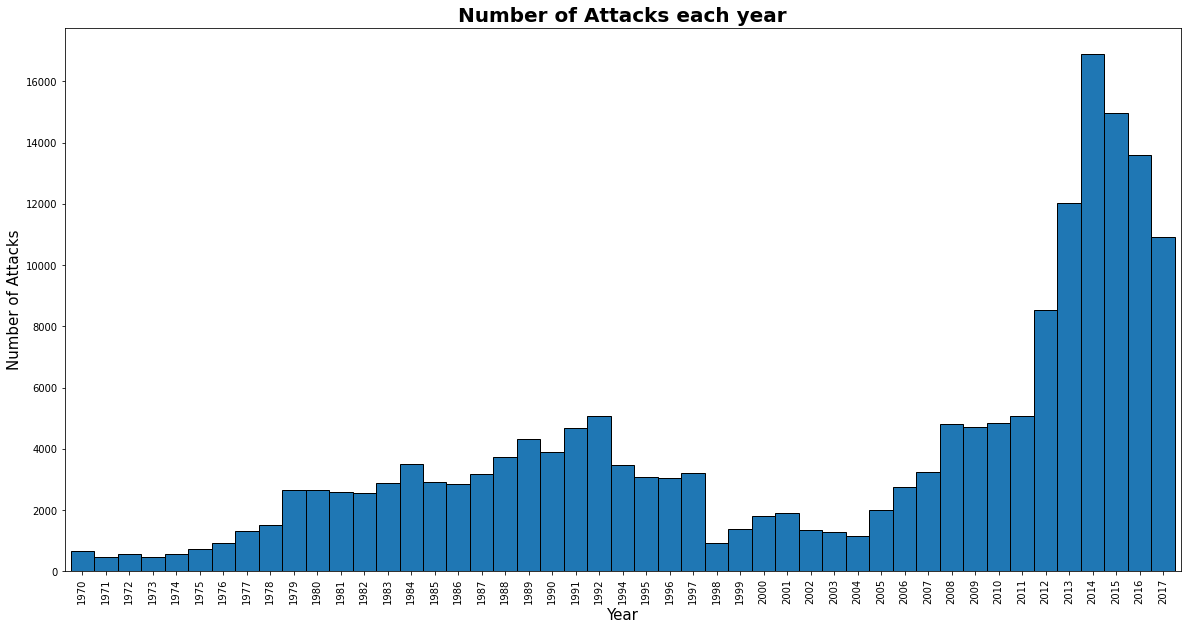

In [76]:
y_count_years.plot.bar(width = 1.0, edgecolor = 'black')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title("Number of Attacks each year", fontsize = 20, weight = 'bold')
plt.ylabel("Number of Attacks", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

**Comparing No. of Attacks with Killings for years 1972 to 2017**

In [77]:
# Comparing No. of Attacks with Killings for years 1972 to 2017
most_attacked_years = df.Year.value_counts().to_frame()
most_attacked_years.columns = ['Attacked']

most_killed_years = df.groupby(['Year'])['Killed'].sum().sort_values(ascending =False).to_frame()

**Top 5 years with most deaths**

In [78]:
most_killed_years.head(5)

,Killed
Year,
2014,46534
2015,40463
2016,36427
2017,27675
2013,22975


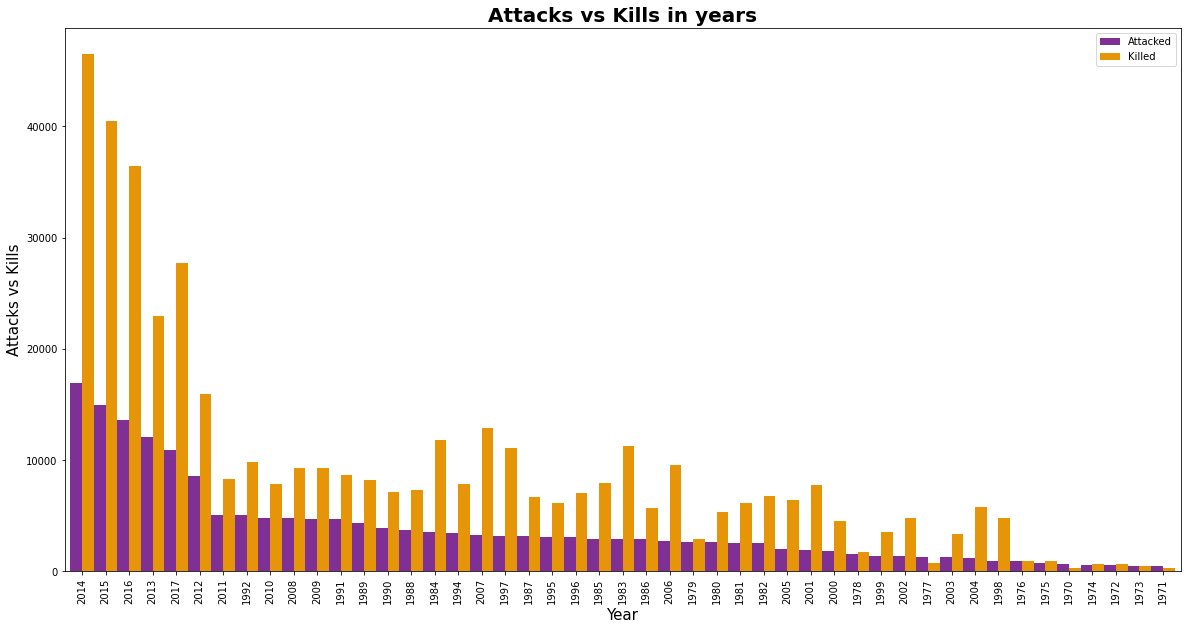

In [79]:
most_attacked_years.merge(most_killed_years, how = 'left', left_index = True, right_index = True).plot.bar(width = 1.0, color = sns.color_palette('CMRmap',2))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title("Attacks vs Kills in years", fontsize = 20, weight = 'bold')
plt.ylabel("Attacks vs Kills", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

**Inference** 2014,2015,2016 are top three year by attack and kills by terrorist

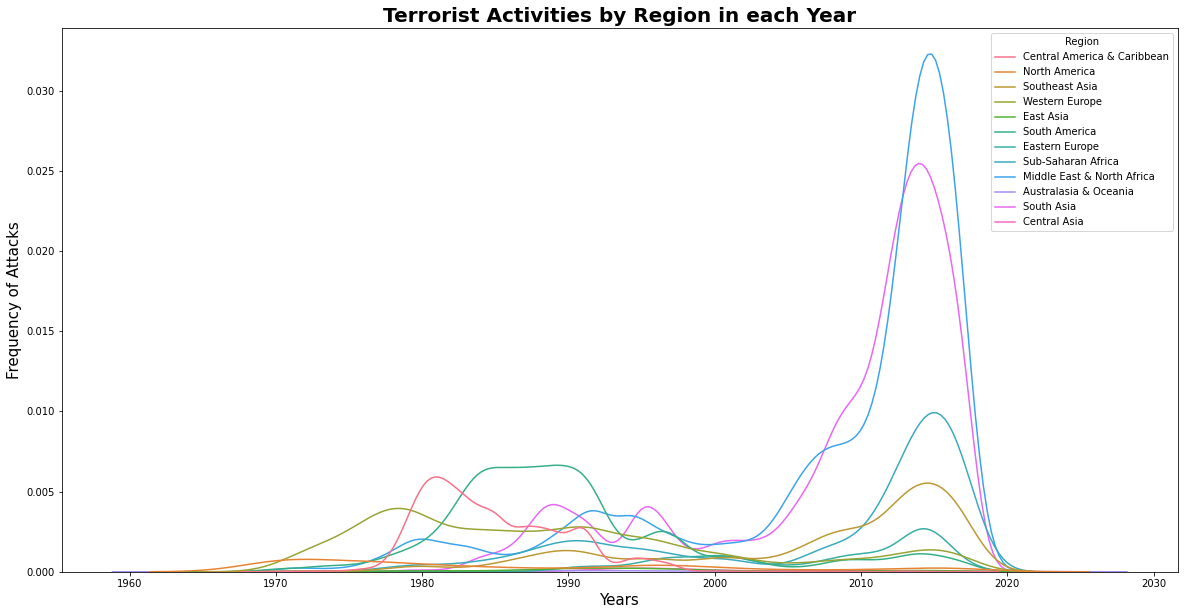

In [83]:
plt.figure(figsize = (20,10))
sns.kdeplot(df['Year'], hue = df['Region'])
plt.title('Terrorist Activities by Region in each Year',fontsize=20, weight = 'bold')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Frequency of Attacks',fontsize=15)
#plt.xticks(rotation=90)
plt.show()

**SUMMARY**

-Global Terrorism Analysis was done by group of 4 members -Nitesh Mishra,Rohit Sharma,Abhishek verma,and Aditya Dhoundiyal.In this project we got 1 csv file global terrorism as an input.

So,we decided this into 4 different task.

Work done by every individual discription 

**NITESH MISHRA**-We first decided to take up this project solely due to our mutual interest in GLOBAL TERRORISM becouse of it relates  in real life.when we download the csv file we were shocked how big data is this,we talk about project in very tharoly manner and split the task.
After split the task we decided team member gives his insight from project in own end,after doing this i go for the project and some analysis from the given data,the very first problem that i faced in my csv file was the name of some columns are unmeaningful. Then i change name of columns in meaning way by using function rename like {'imonth':'month'},{'iyear':'year'},then select some useful rows and columns for further analysis.
The two insight of mine.

1-The top 3 attack types is BOMBING/EXPLOSION,ARMED ASSOULT,ASSASSAINATION

The top 3 attack types in percentage.

Bombing/Explosion=48.6%

Armed Assoult=23.5%

Assassination=10.6%

2-The top 3 three countries and states are most attacks.

(COUNTRIES)
IRAQ,
PAKISTAN,
AFGANISTAN

(STATES) BAGHDAD,NORTHERN IRELAND,BALOCHISTAN

**ROHIT SHARMA**-When i started the project i have some ideas like name of columns are meaningful manner,and i have already two insight that given by nitesh then i decided go in continuation.The two insight of my end are.

1-Top 3 target type are

Private Citizens & Property,
Military,Police

2-Top 3 attacked regions are in percentage :

Middle East & North Africa-27.8%,
South Asia-24.8%,
South America-10.4%

**ABHISHEK VERMA**-When i started the project i have multiple idea like structure data and four insight of project then i go for insight from my end.

1-Top 3 weapons used are;

Explosives,
Firearms,unknown

2-Top 3 terrorist groups :

Taliban,Islamic State of Iraq and the Levant (ISIL),Shining Path (SL)

**ADITYA DHOUNDIYAL**-I m working for end this project with the remaing insight of project from my end also,i have aslo multiple ideas clues that are given by my team members,the insight of mine are

1-Year-Wise Analysis of Attacks and Casualties
The top the 3 most attack and casualties in year is 

1-2014 = 46534

2-2015 = 40463

3-2016 = 36427



**CONCLUSIONS**

1-The top 3 attack types is BOMBING/EXPLOSION,ARMED ASSOULT,ASSASSAINATION

The top 3 attack types in percentage.

Bombing/Explosion=48.6%

Armed Assoult=23.5%

Assassination=10.6%

2-The top 3  countries and states are most attacks.

(COUNTRIES) IRAQ, PAKISTAN, AFGANISTAN

(STATES) BAGHDAD,NORTHERN IRELAND,BALOCHISTAN 

3-Top 3 target type are

Private Citizens & Property, Military,Police

4-Top 3 attacked regions are in percentage :

Middle East & North Africa-27.8%, South Asia-24.8%, South America-10.4%

5-Top 3 weapons used are;

Explosives, Firearms,unknown

6-Top 3 terrorist groups :

Taliban,Islamic State of Iraq and the Levant (ISIL),Shining Path (SL)

7-Year-Wise Analysis of Attacks and Casualties The top the 3 most attack and casualties in year is

1-2014 = 46534

2-2015 = 40463

3-2016 = 36427